In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [2]:
df  = pd.read_csv("/content/student-scores.csv")

In [3]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [5]:
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [6]:
df = df.drop(columns=['id','first_name','last_name','email'])


In [7]:
df['TOTAL_MARK'] = (df['math_score']+df['history_score']+df['physics_score']+df['chemistry_score']+df['biology_score']+df['english_score']+df['geography_score']) / 7

In [8]:
df['TOTAL_MARK']

0       82.000000
1       91.428571
2       86.428571
3       78.714286
4       74.428571
          ...    
1995    79.714286
1996    76.285714
1997    82.571429
1998    80.857143
1999    88.142857
Name: TOTAL_MARK, Length: 2000, dtype: float64

In [9]:
df = df.drop(columns=['math_score','history_score','physics_score','chemistry_score','biology_score','english_score','geography_score'])
df

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,TOTAL_MARK
0,male,False,3,False,27,Lawyer,82.000000
1,female,False,2,False,47,Doctor,91.428571
2,female,False,9,True,13,Government Officer,86.428571
3,female,False,5,False,3,Artist,78.714286
4,male,False,5,False,10,Unknown,74.428571
...,...,...,...,...,...,...,...
1995,male,False,2,False,30,Construction Engineer,79.714286
1996,male,False,2,False,20,Software Engineer,76.285714
1997,female,False,5,False,14,Software Engineer,82.571429
1998,female,True,10,True,5,Business Owner,80.857143


In [10]:
df['gender'] = df['gender'].replace({'male':0,'female':1})
df['part_time_job'] = df['part_time_job'].astype(int)
df['extracurricular_activities'] = df['extracurricular_activities'].astype(int)

In [11]:
df

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,TOTAL_MARK
0,0,0,3,0,27,Lawyer,82.000000
1,1,0,2,0,47,Doctor,91.428571
2,1,0,9,1,13,Government Officer,86.428571
3,1,0,5,0,3,Artist,78.714286
4,0,0,5,0,10,Unknown,74.428571
...,...,...,...,...,...,...,...
1995,0,0,2,0,30,Construction Engineer,79.714286
1996,0,0,2,0,20,Software Engineer,76.285714
1997,1,0,5,0,14,Software Engineer,82.571429
1998,1,1,10,1,5,Business Owner,80.857143


<Axes: xlabel='career_aspiration'>

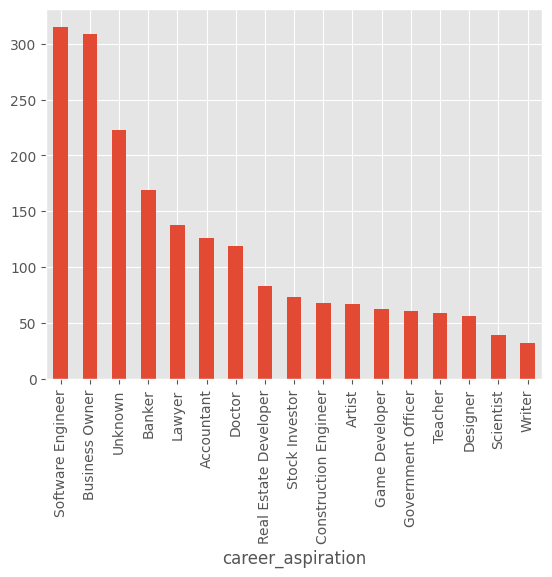

In [12]:
df['career_aspiration'].value_counts().plot(kind='bar')

In [13]:
labelencoder = LabelEncoder()
df['career_aspiration'] = labelencoder.fit_transform(df['career_aspiration'])
df

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,TOTAL_MARK
0,0,0,3,0,27,9,82.000000
1,1,0,2,0,47,6,91.428571
2,1,0,9,1,13,8,86.428571
3,1,0,5,0,3,1,78.714286
4,0,0,5,0,10,15,74.428571
...,...,...,...,...,...,...,...
1995,0,0,2,0,30,4,79.714286
1996,0,0,2,0,20,12,76.285714
1997,1,0,5,0,14,12,82.571429
1998,1,1,10,1,5,3,80.857143


In [14]:
X = df.drop(columns = 'TOTAL_MARK')
y = df['TOTAL_MARK']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [16]:
# Use the best parameters to train the final model
best_params = {'n_estimators': 439,
    'max_depth': 3,
    'learning_rate': 0.017629084511653136,
    'subsample': 0.9713755557379617,
    'colsample_bytree': 0.7354143949346962,
    'reg_alpha': 8.318950808630586,
    'reg_lambda': 7.638009786115094}

xgb_best = XGBRegressor(**best_params)
xgb_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = xgb_best.predict(X_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse_test)

Test RMSE: 4.4794974478594405


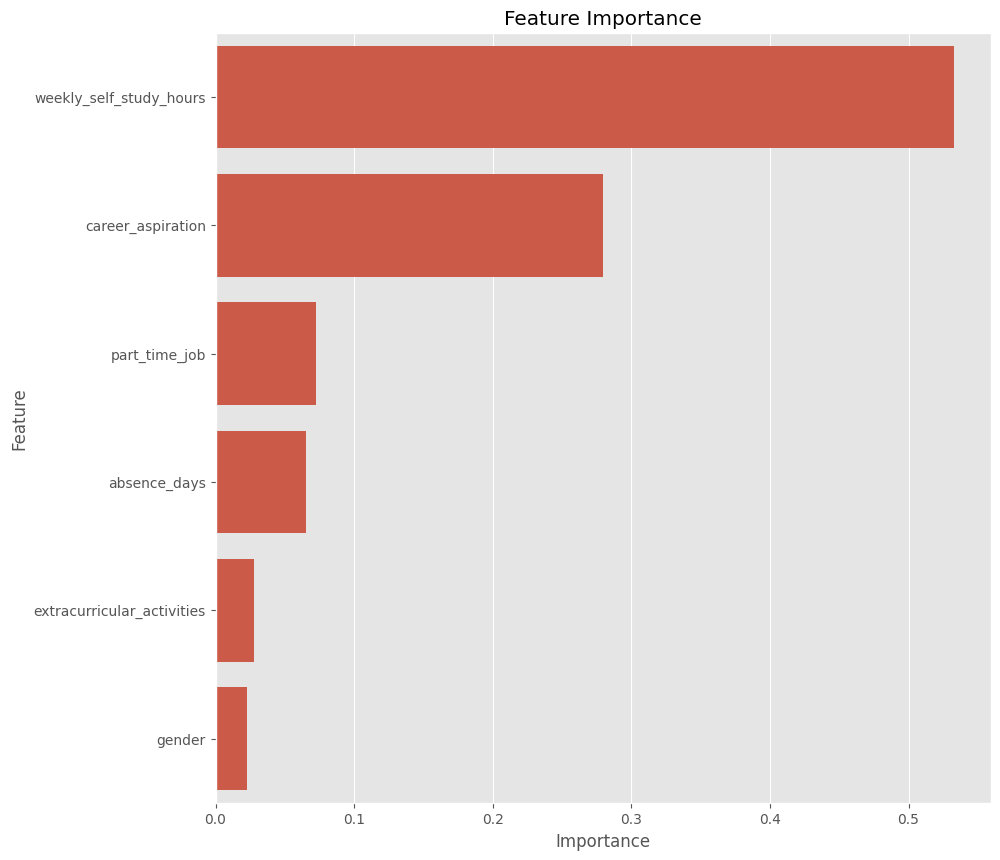

In [18]:
# Optianing the most features that had an impact of our price
def plot_feature_importance(model, feature_names=None, top_n=10, plot=True):

    feature_importance = model.feature_importances_

    if feature_names is None:
        feature_names = model.feature_name()

    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

    if plot:
        plt.figure(figsize=(10, 10))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title('Feature Importance')
        plt.show()

    return feature_importance_df

feature_importance_df = plot_feature_importance(xgb_best,feature_names=X.columns)